# Project Journal

**Name:** Chandler Yang

**Research Question:** Looking at the impact of different renewable sources on the total renewable energy consumption in the U.S. from 1980 to 2021, can the growth in total renewable energy consumption be explained by the combined influence of solar, wind, biomass, and hydroelectric energy?

**Variables:**  
$Y$: Total Renewable Energy  
$X_1$: Solar Energy  
$X_2$: Wind Energy  
$X_3$: Biomass Energy  
$X_4$: Hydroelectric Power 

## Data Prep & EDA  
**Dates:** November 1 - November 7  
**Meeting Date:** November 7

### Data Cleaning Summary
**Summary of data cleaning process:**
1. Import libraries
2. Import dataset
3. Check for missing values
4. Filter dataset for necessary columns 

**Issues Encountered and Resolutions:** Minor column syntax issues and was able to resolve by printing the column names.

In [83]:
#Step 1: Import necessary libraries
library(factoextra)
library(knitr)
library(GGally)
library(corrplot)
library(tidyr)
library(dplyr)
library(ggplot2)

In [15]:
#Step 2: Import dataset
data <- read.csv("/Users/chandleryang/Desktop/USRenewableEnergyConsumption.csv")

In [16]:
#Step 3: Check for missing values 
missing_values <- colSums(is.na(data))
print(missing_values) # Print the count of missing values in each column

                              Year                              Month 
                                 0                                  0 
                            Sector                Hydroelectric.Power 
                                 0                                  0 
                 Geothermal.Energy                       Solar.Energy 
                                 0                                  0 
                       Wind.Energy                        Wood.Energy 
                                 0                                  0 
                      Waste.Energy Fuel.Ethanol..Excluding.Denaturant 
                                 0                                  0 
    Biomass.Losses.and.Co.products                     Biomass.Energy 
                                 0                                  0 
            Total.Renewable.Energy              Renewable.Diesel.Fuel 
                                 0                                  0 
      

In [28]:
#Step 4: Filter dataset for the years 1980 - 2021 and select relevant columns
filtered_data <- data %>%
  filter(Year >= 1980 & Year <= 2021) %>%
  select(
    Year, # Year
    Month, # Month
    Total_Renewable_Energy = Total.Renewable.Energy, # Y
    Solar_Energy = Solar.Energy, # X1
    Wind_Energy = Wind.Energy, # X2
    Biomass_Energy = Biomass.Energy, # X3
    Hydroelectric_Power = Hydroelectric.Power # X4
  )

head(filtered_data)


,Year,Month,Total_Renewable_Energy,Solar_Energy,Wind_Energy,Biomass_Energy,Hydroelectric_Power
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1980,1,1.779,0,0,1.779,0.000
2,1980,1,87.934,0,0,0.537,0.000
3,1980,1,136.514,0,0,135.519,0.995
4,1980,1,71.995,0,0,0.000,0.000
5,1980,1,0.000,0,0,0.000,0.000
6,1980,2,1.664,0,0,1.664,0.000


### Exploratory Data Analysis Findings
**Key Visualizations:**  
- The time series plots show that total renewable energy consumption has increased over time, driven by rapid growth in wind and solar energy since the early 2000s. Biomass energy has also grown but at a steadier rate, while hydroelectric power has fluctuated and declined slightly in recent years.
- The correlation matrix and plot show significant correlations between Hydroelectric Power and Biomass Energy, Biomass Energy and Total Renewable Energy, and Wind Energy and Solar Energy.
- The pair plot show Biomass and Hydroelectric Energy have strong positive correlations with Total Renewable Energy, contributing significantly to the overall trend. Solar and Wind Energy show weaker correlations with Total Renewable Energy but are strongly correlated with each other. 
- The PCA plots show that the first two principal components explain a large portion of the variance in the data. In the biplot, Hydroelectric Power and Biomass Energy are positively aligned with the first principal component (Dim1), where they contribute strongly to this component and are similar in their variation patterns. The Total Renewable Energy consumption is influenced by these sources, with Hydroelectric and Biomass behaving differently from Solar and Wind.



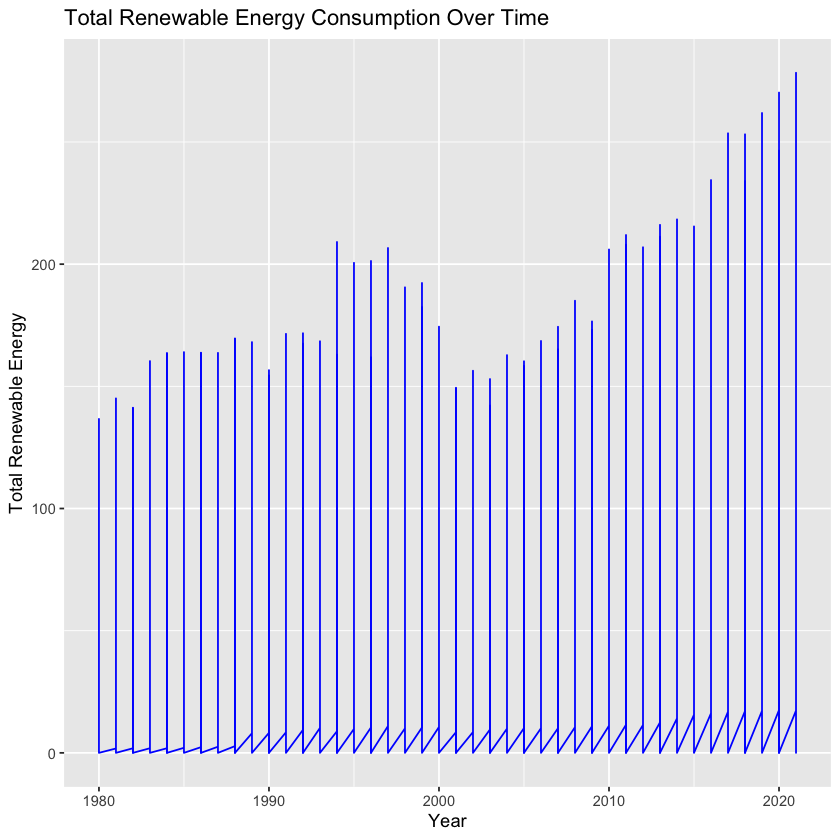

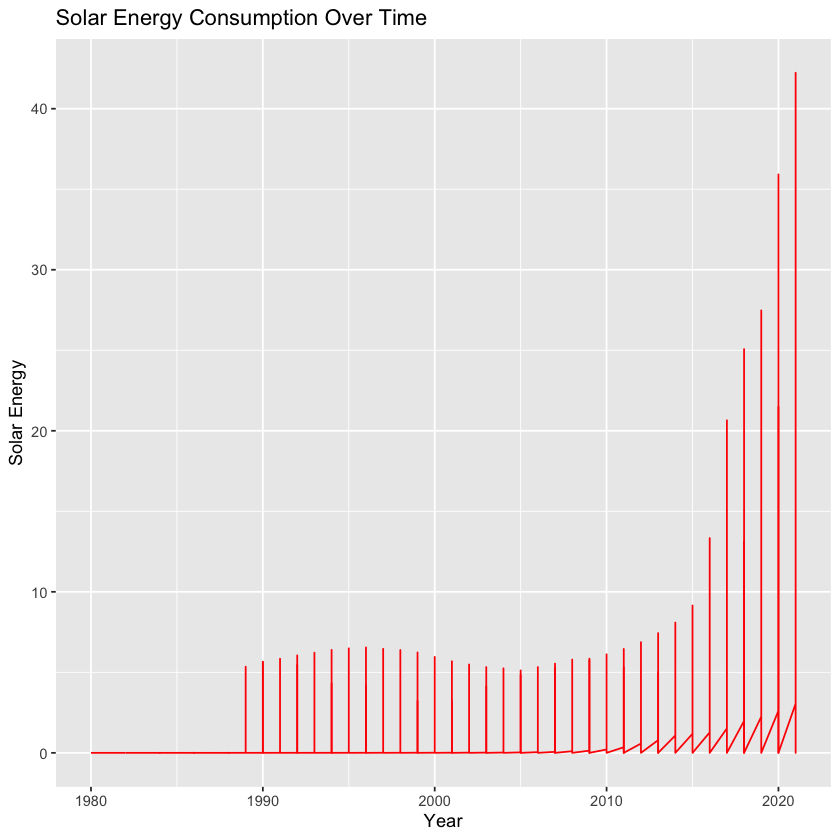

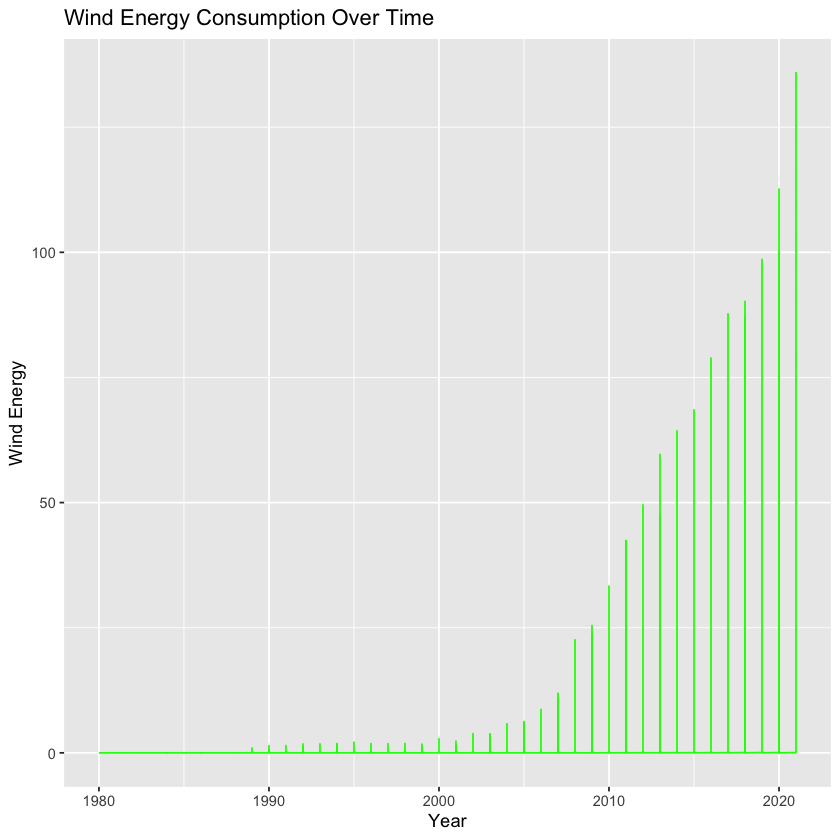

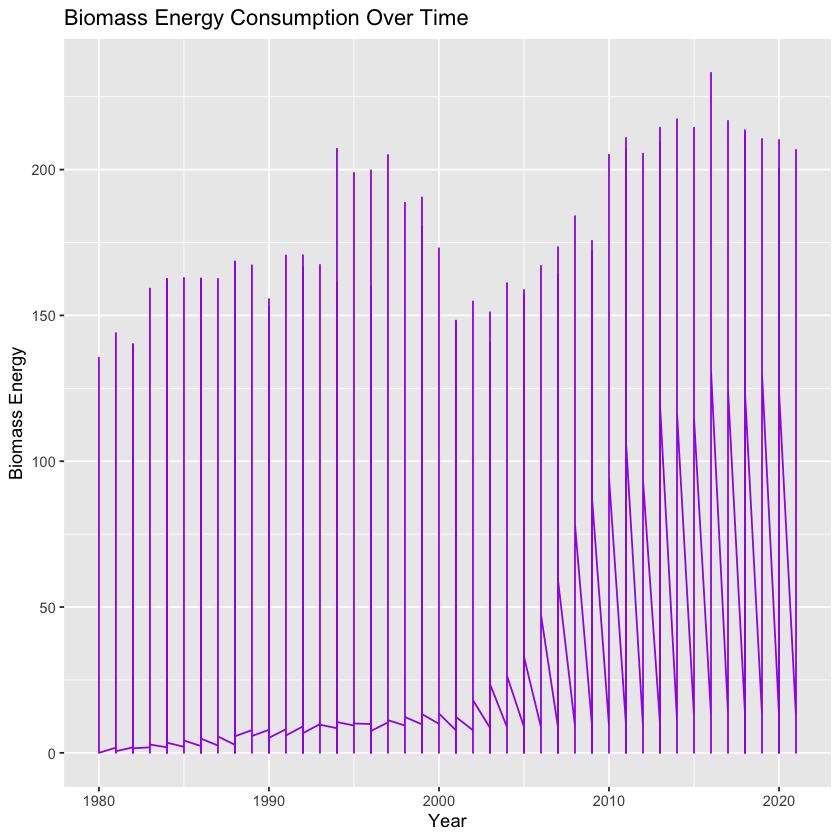

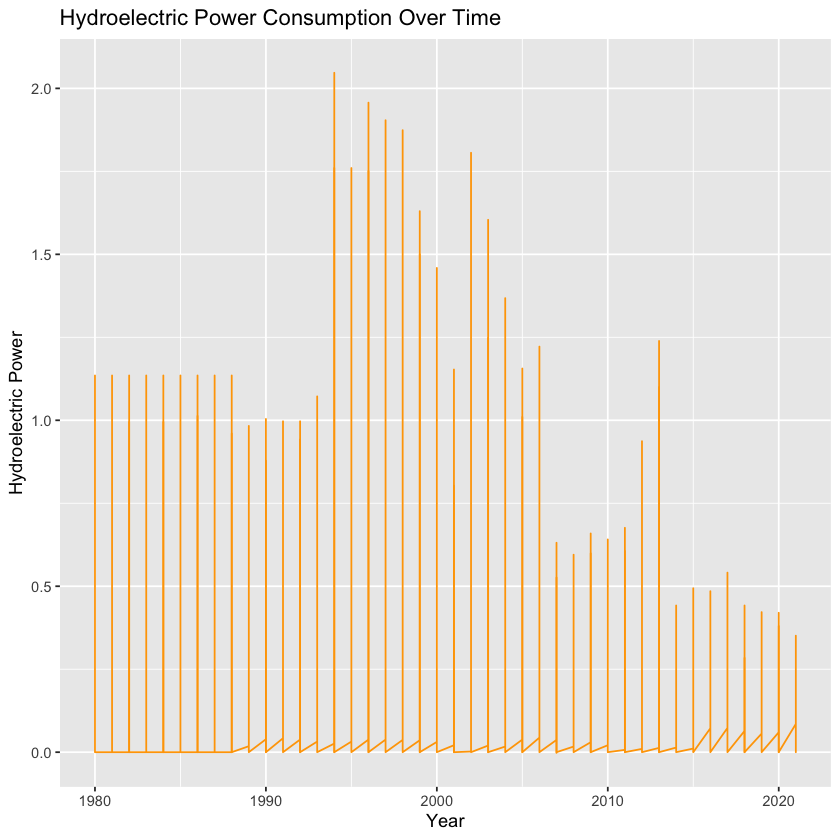

In [42]:
# Time Series Plots for Total Renewable Energy and Each Renewable Source
# Plot for Total Renewable Energy
ggplot(filtered_data, aes(x = Year, y = Total_Renewable_Energy)) +
  geom_line(color = "blue") +
  labs(title = "Total Renewable Energy Consumption Over Time",
       x = "Year",
       y = "Total Renewable Energy")

# Plot for Solar Energy
ggplot(filtered_data, aes(x = Year, y = Solar_Energy)) +
  geom_line(color = "red") +
  labs(title = "Solar Energy Consumption Over Time",
       x = "Year",
       y = "Solar Energy")

# Plot for Wind Energy
ggplot(filtered_data, aes(x = Year, y = Wind_Energy)) +
  geom_line(color = "green") +
  labs(title = "Wind Energy Consumption Over Time",
       x = "Year",
       y = "Wind Energy")

# Plot for Biomass Energy
ggplot(filtered_data, aes(x = Year, y = Biomass_Energy)) +
  geom_line(color = "purple") +
  labs(title = "Biomass Energy Consumption Over Time",
       x = "Year",
       y = "Biomass Energy")

# Plot for Hydroelectric Power
ggplot(filtered_data, aes(x = Year, y = Hydroelectric_Power)) +
  geom_line(color = "orange") +
  labs(title = "Hydroelectric Power Consumption Over Time",
       x = "Year",
       y = "Hydroelectric Power")


[1] "Significant Correlations (|correlation| > 0.5):"
              Variable_1          Variable_2 Correlation
1         Biomass_Energy Hydroelectric_Power   0.7359042
2           Solar_Energy         Wind_Energy   0.6842384
3 Total_Renewable_Energy      Biomass_Energy   0.6360628
4 Total_Renewable_Energy Hydroelectric_Power   0.5287672


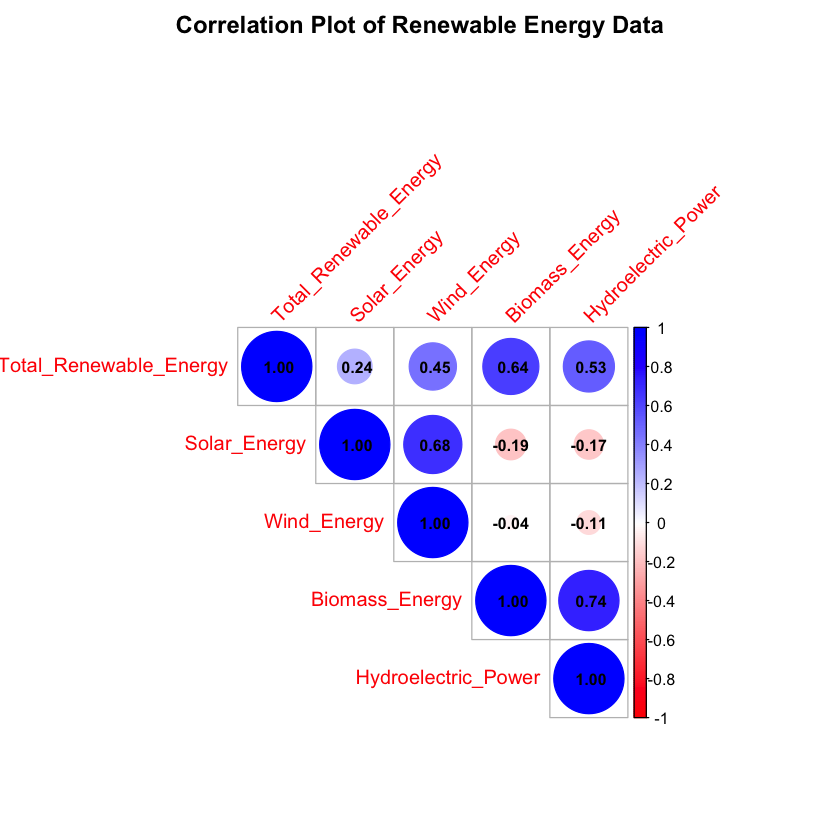

In [88]:
# Significant Correlations Between the Different Energy Sources and Total Renewable Energy
# Calculate the correlation matrix 
cor_matrix <- cor(filtered_data %>% select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Biomass_Energy, Hydroelectric_Power))

cor_tidy <- as.data.frame(as.table(cor_matrix))
colnames(cor_tidy) <- c("Variable_1", "Variable_2", "Correlation")

# Filter for significant correlations (|correlation| > 0.5), remove self-correlations, and retain only unique pairs
significant_correlations <- cor_tidy %>%
  filter(abs(Correlation) > 0.5 & Variable_1 != Variable_2) %>%
  arrange(desc(abs(Correlation))) %>%
  filter(as.numeric(factor(Variable_1)) < as.numeric(factor(Variable_2)))

print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)

# Correlation Plot for Entire Correlation Matrix
library(corrplot)
corrplot(
  cor_matrix,
  method = "circle",             
  type = "upper",                
  tl.col = "red",                
  tl.srt = 45,                   
  addCoef.col = "black",         
  number.cex = 0.8,              
  col = colorRampPalette(c("red", "white", "blue"))(200), 
  title = "Correlation Plot of Renewable Energy Data", 
  mar = c(0, 0, 2, 0)            
)



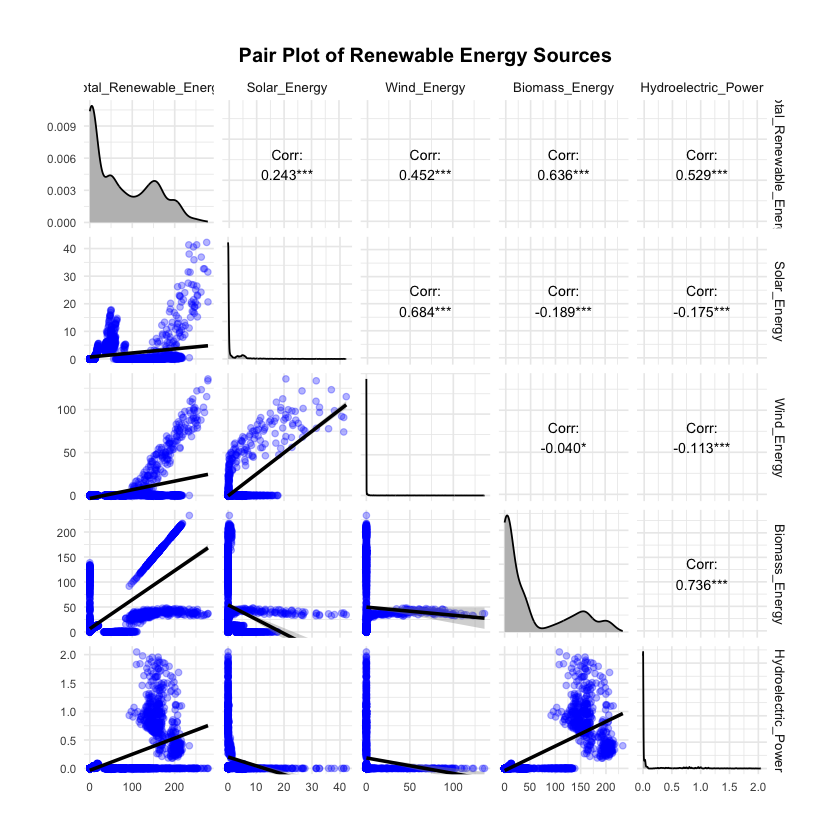

In [75]:
# Pair Plot to See Variable Pair's Relationships
ggpairs(
  filtered_data %>% select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Biomass_Energy, Hydroelectric_Power),
  title = "Pair Plot of Renewable Energy Sources",
  upper = list(continuous = wrap("cor", size = 3, color = "black")),   
  lower = list(continuous = wrap("smooth", alpha = 0.3, color = "blue")),
  diag = list(continuous = wrap("densityDiag", fill = "grey", color = "black"))
) +
  theme_minimal(base_size = 10) +                   
  theme(
    plot.title = element_text(hjust = 0.5, size = 12, face = "bold"),  
    axis.text = element_text(size = 7),            
    strip.text = element_text(size = 8),           
    plot.margin = unit(c(1, 1, 1, 1), "cm")         
  )


Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.5139 1.3760 0.61396 0.48773 0.44706
Proportion of Variance 0.4584 0.3787 0.07539 0.04758 0.03997
Cumulative Proportion  0.4584 0.8371 0.91245 0.96003 1.00000

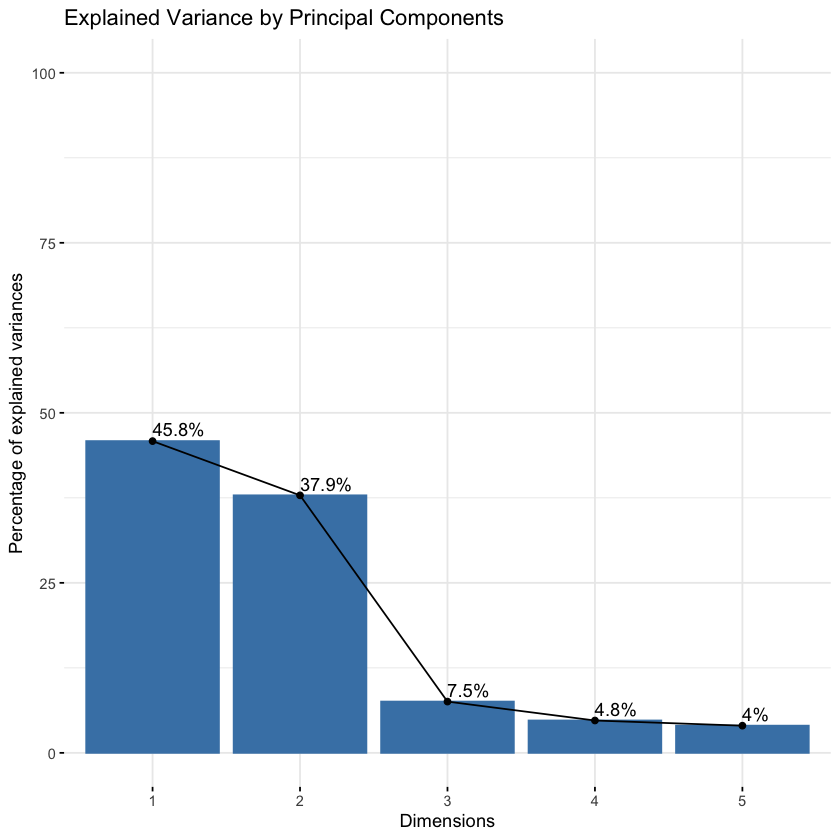

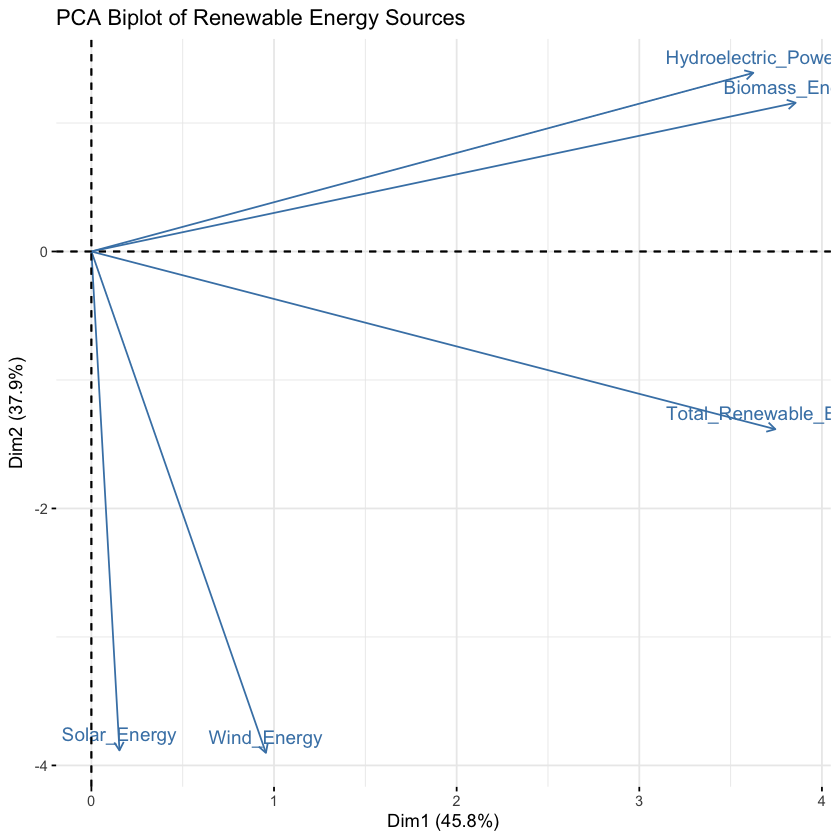

In [ ]:
# PCA to Examine the Combined Variance Explained by Multiple Renewable Sources
pca_data <- filtered_data %>% 
  select(Solar_Energy, Wind_Energy, Biomass_Energy, Hydroelectric_Power, Total_Renewable_Energy) %>%
  na.omit()  # Remove rows with NA values for PCA

# Perform PCA (scale = TRUE to standardize the data)
pca_result <- prcomp(pca_data, scale = TRUE)
summary(pca_result)

# Plot explained variance by each principal component
fviz_eig(pca_result, addlabels = TRUE, ylim = c(0, 100)) +
  labs(title = "Explained Variance by Principal Components")

# Biplot to visualize the PCA
fviz_pca_biplot(pca_result, label = "var", 
                habillage = filtered_data$Year, addEllipses = FALSE, 
                title = "PCA Biplot of Renewable Energy Sources",
                geom.ind = list(shape = 19)) 


### Summary Statistics

In [81]:
# Calculate Summary Statistics for Each Numeric Column in the Dataset
summary_stats <- filtered_data %>%
  summarise(
    Total_Renewable_Energy_mean = mean(Total_Renewable_Energy, na.rm = TRUE),
    Total_Renewable_Energy_sd = sd(Total_Renewable_Energy, na.rm = TRUE),
    Solar_Energy_mean = mean(Solar_Energy, na.rm = TRUE),
    Solar_Energy_sd = sd(Solar_Energy, na.rm = TRUE),
    Wind_Energy_mean = mean(Wind_Energy, na.rm = TRUE),
    Wind_Energy_sd = sd(Wind_Energy, na.rm = TRUE),
    Biomass_Energy_mean = mean(Biomass_Energy, na.rm = TRUE),
    Biomass_Energy_sd = sd(Biomass_Energy, na.rm = TRUE),
    Hydroelectric_Power_mean = mean(Hydroelectric_Power, na.rm = TRUE),
    Hydroelectric_Power_sd = sd(Hydroelectric_Power, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  

kable(summary_stats, caption = "Summary Statistics for Key Variables", digits = 2)




Table: Summary Statistics for Key Variables

|Statistic                   | Value|
|:---------------------------|-----:|
|Total_Renewable_Energy_mean | 73.28|
|Total_Renewable_Energy_sd   | 71.68|
|Solar_Energy_mean           |  1.78|
|Solar_Energy_sd             |  4.34|
|Wind_Energy_mean            |  4.00|
|Wind_Energy_sd              | 15.93|
|Biomass_Energy_mean         | 49.11|
|Biomass_Energy_sd           | 65.52|
|Hydroelectric_Power_mean    |  0.17|
|Hydroelectric_Power_sd      |  0.38|